Loaded imresps with shape: (1573, 2, 15363)
Loaded stimids with shape: (1573,)
[-0.04642661 -0.00652567 -0.06135698 ... -0.03122817 -0.01333765
 -0.01858977]
[-0.01951828  0.01752452 -0.00025861 ...  0.04749728  0.00126273
  0.04111225]
[-0.02870124 -0.00779208 -0.03693817 ...  0.2054905   0.03139729
  0.02270184]
[-0.02790046 -0.00773183 -0.03562235 ...  0.25863819  0.03241504
  0.02322918]
Real SRV shape: (15363,)
[0.05073368 0.07601509 0.04024057 ... 0.0823237  0.06196299 0.0671186 ]
Number of reliable neurons: 3692
Indices of reliable neurons: [   48    71    91 ... 15356 15358 15360]
Dimensionality of neural responses: (1573, 500)
Top 500 reliable neuron indices: [13560  6355  9560  7456  9531  9363  8882  7057  8854 11562]
Corresponding SRV scores: [0.51040568 0.50978301 0.50382989 0.47603652 0.46924255 0.45725156
 0.44607444 0.4396689  0.43827291 0.43824862]
Top 500 neural responses shape: (1573, 2, 500)
Averaged top 500 neural responses shape: (1573, 500)


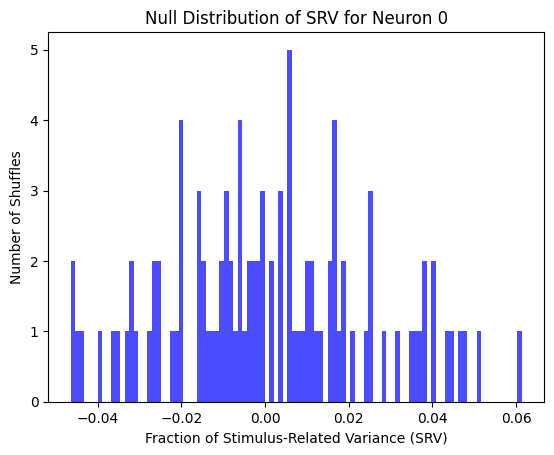

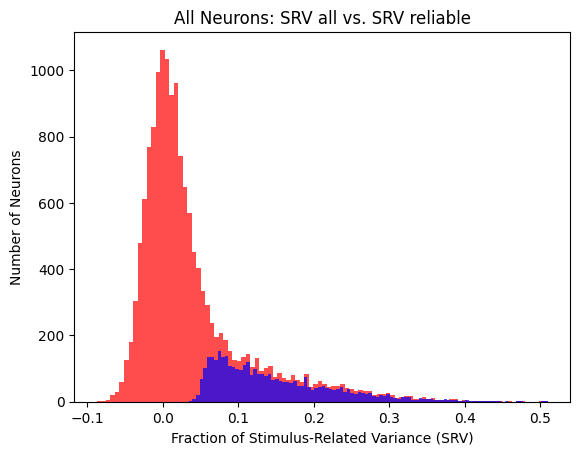

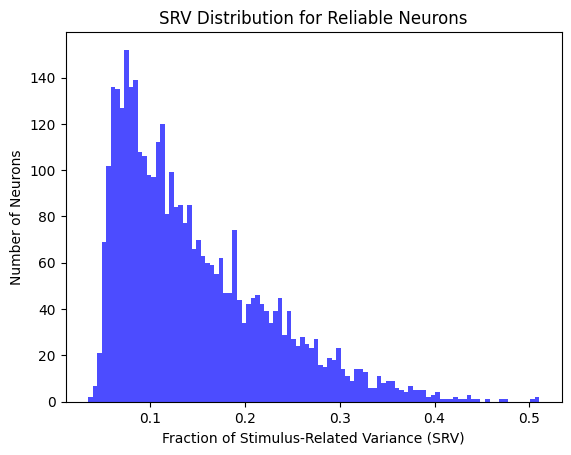

In [1]:
from cortexlib.mouse import CortexlabMouse

mouse = CortexlabMouse()

null_srv_all_neurons = mouse.compute_null_all_neurons(n_shuffles=100)
real_srv_all_neurons = mouse.compute_real_srv_all_neurons()
reliable_neuron_indices = mouse.get_reliable_neuron_indices(
            null_srv_all_neurons, real_srv_all_neurons, percentile_threshold=99)
neural_responses_mean, neural_responses, _ = mouse.get_responses_for_reliable_neurons(reliable_neuron_indices, real_srv_all_neurons, num_neurons=500)

mouse.plot_null_distribution_for_neuron(null_srv_all_neurons, neuron_index=0)
mouse.plot_real_srv_distribution(real_srv_all_neurons, reliable_neuron_indices)

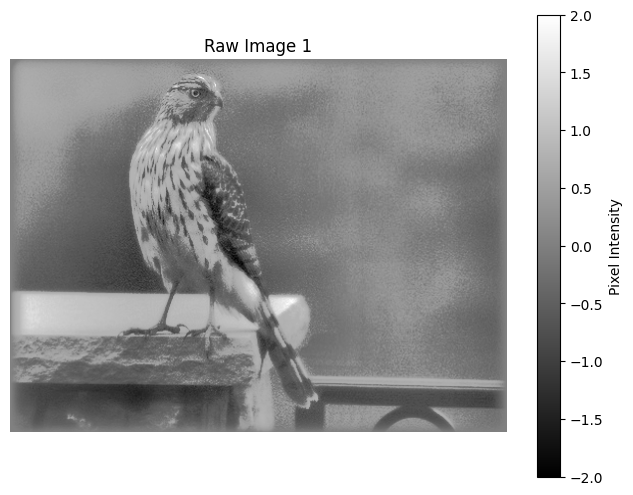

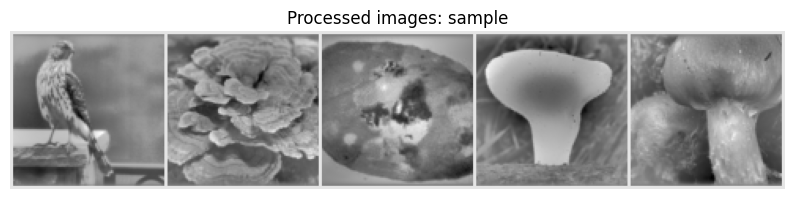

In [2]:
from cortexlib.images import CortexlabImages

images = CortexlabImages()
images.plot_raw_image(int(mouse.stimulus_ids[0]))
image_dataset = images.load_images_shown_to_mouse(mouse.stimulus_ids)
images.show_sample(image_dataset, n=5)

In [3]:
from cortexlib.simclr import PreTrainedSimCLRModel

simclr = PreTrainedSimCLRModel()
simclr_features, _ = simclr.extract_features(image_dataset)

/Users/callummessiter/workspace/msc-neuro/research-project/myenv/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/callummessiter/workspace/msc-neuro/research-project/myenv/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/Users/callummessiter/workspace/msc-neuro/research-project/cortexlib/cortexlib/simclr.py:60: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/bl

Already downloaded pretrained model: https://raw.githubusercontent.com/phlippe/saved_models/main/tutorial17/SimCLR.ckpt


  0%|          | 0/25 [00:00<?, ?it/s]

✅ Feature extraction complete. Final feature shapes:
Final layer: torch.Size([1573, 512])
layer1: torch.Size([1573, 64, 24, 24])
layer2: torch.Size([1573, 128, 12, 12])
layer3: torch.Size([1573, 256, 6, 6])
layer4: torch.Size([1573, 512, 3, 3])


In [6]:
### Predict raw neural responses using SimCLR features

from cortexlib.predictor import SimCLRNeuralPredictor

for layer, feats in simclr_features.items():
    predictor = SimCLRNeuralPredictor()
    r_squared = predictor.compute_r_squared(feats, neural_responses)
    fev = predictor.compute_fev(feats, neural_responses)
    print(f"Layer: {layer}, R^2: {r_squared['test_r2']:.4f} FEV: {fev['mean_fev']:.4f}")

Layer: layer1, R^2: 0.0193 FEV: 0.1026
Layer: layer2, R^2: 0.0305 FEV: 0.1785
Layer: layer3, R^2: 0.0360 FEV: 0.1574
Layer: layer4, R^2: 0.0226 FEV: 0.1125
Layer: fc, R^2: 0.0159 FEV: 0.0908


In [ ]:
### Predict PC1 of neural data using SimCLR features

from cortexlib.predictor import NeuralPrincipleComponentPredictor

index_pc_to_predict = 0

for layer, feats in simclr_features.items():
    predictor = NeuralPrincipleComponentPredictor()
    r_squared = predictor.compute_r_squared(feats, neural_responses, index_pc_to_predict)
    fev = predictor.compute_fev(feats, neural_responses, index_pc_to_predict)
    print(f"Layer: {layer}, R^2: {r_squared['test_r2']:.4f} FEV: {fev['mean_fev']:.4f}")

Layer: layer1, R^2: 0.3383 FEV: 0.3582
Layer: layer2, R^2: 0.4111 FEV: 0.4346
Layer: layer3, R^2: 0.4233 FEV: 0.4474
Layer: layer4, R^2: 0.3981 FEV: 0.4209
Layer: fc, R^2: 0.3814 FEV: 0.4034
